# Struc2Vec Implementation

### Yonsei App. Stat. 
### Sunwoo Kim

KDD 17'에서 발표한 network embedding technique입니다.

Graph에서 node의 structural role을 embedding하는 알고리즘입니다.  
Numpy를 사용했으며, 본 논문에서 제시한대로 dtw에 약간의 변형을 가했습니다.  
$dtw(a,b) = \frac{max(a,b)}{min(a,b} - 1$  
따라서 변형된 dtw 패키지를 사용해야 합니다. (첨부하였음.)

## 1. Data&Function preparation 

In [22]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys 
import networkx as nx 
import time
from IPython.display import clear_output
import matplotlib.colors as mcolors

In [2]:
a = []
with open('karate_club.adjlist') as f : 
    for line in f : 
        a.append(line.rstrip().split())
a = a[3:]
adj_array = np.zeros(len(a)*len(a)).reshape(len(a), len(a))

for i1 in a : 
    for i2 in range(len(i1)) : 
        index1 = int(i1[0]) ; index2 = int(i1[i2])
        adj_array[index1, index2] = 1

adj_half = adj_array
adj_array = adj_array + adj_array.transpose()

for i in range(adj_array.shape[0]) : adj_array[i,i] = 0
for i in range(adj_half.shape[0]) : adj_half[i,i] = 0

## 현재 Edge Index가 adj_array에 할당된 상태입니다

target = []
with open('karate_label.txt') as f : 
    for line in f : 
        target.append(int(line.rstrip().split()[1]))

red = np.where(np.array(target) == 1)[0] + 1
green = np.where(np.array(target) == 0)[0] + 1

## 색깔별 노드의 class를 할당해줍니다.

In [3]:
new_adj = np.hstack([np.vstack([adj_array, np.zeros(shape = (34,34))]), 
                     np.vstack([np.zeros(shape = (34,34)), adj_array])])
new_adj[0,35] = 1 ; new_adj[35,0] = 1
new_adj

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [35]:
## 시각화를 위한 함수를 정의해줍니다.

def visualize_result (embedding_result, title) :
    entire_colors = []
    for i in colors.get_named_colors_mapping() : 
        entire_colors.append(colors.get_named_colors_mapping()[i])
    plt.figure(figsize = (10, 10))
    plt.title(title)
    for i in range(68) : 
        if i <= 33 : 
            plt.scatter(embedding_result[i,0], embedding_result[i,1], color = entire_colors[2*i])
        else : 
            plt.scatter(embedding_result[i,0], embedding_result[i,1], color = entire_colors[2*(i-34)])
    for i, txt in enumerate(np.arange(1,69)):
        plt.annotate((i + 1), (embedding_result[:, 0][i], embedding_result[:, 1][i]), size = 15)
    plt.show()

## 2. Model & Training

In [4]:
from sunwoo_struc2vec import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [5]:
model = sunwoo_struc2vec_training(new_adj)

In [6]:
model.get_ready(3)

Weight Matrix 등 학습 준비가 완료되었습니다!


In [12]:
model.fit(epochs = 10, 
         learning_rate = 0.02, 
         walk_length = 15, 
         window_size = 3, 
         hidden_size = 2)

학습이 시작됩니다! Go~
Learning Finished! It took 2.1294915676116943 sec


## 3. Training Result

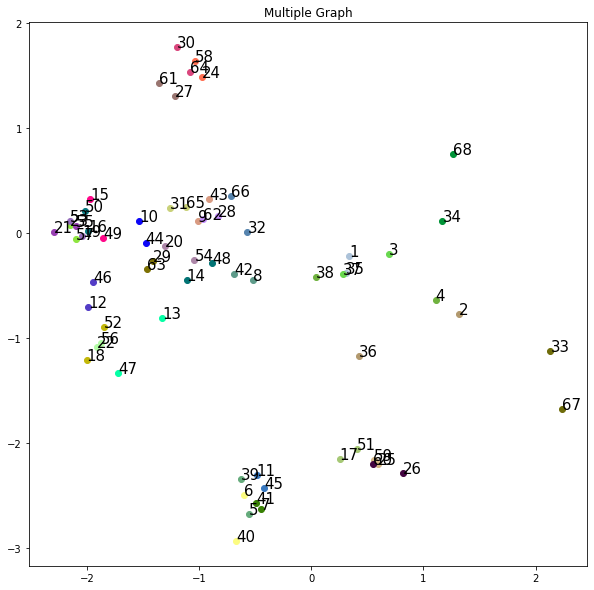

In [36]:
visualize_result(model.h, 'Multiple Graph')

논문에서 사용한 synthetic karate 처럼, 구조적으로 노드번호의 간격이 34인 노드들은   
완전히 동일한 structural role을 갖고 있습니다.  
이들은 위의 그림에서 같은 색으로 표현되어있습니다.  
**Struc2Vec이 이 부분을 잘 파악하여 구조적으로 비슷한 노드들을 비슷하게 위치시킨 것을 확인 가능합니다.**